# Ejercicios Pair Programming - Módulo 2 Sprint 1
## Lección 3 - Repaso Visualización y Estadística
### Noemi Azorin y Silvia Gordón

Vamos ahora a tomar de nuevo el conjunto de datos con el que estuvimos trabajando en los últimos días y vamos a continuar con el análisis de las estadísitcas de los contenidos del conjunto de datos.

Para todas los ejercicios de pair programming de Estadística I, II y III usaremos el dataframe que se tome para el desarrollo de este ejercicio de pair programming.

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as st
from scipy.stats import skew

In [56]:
# Carga datos del csv

instagram3 = pd.read_csv("./Datasets/instagram_gloabal2.csv", index_col=0)
instagram3.head()

,country,rank,account,title,link,category,followers,audience_country,authentic_engagement
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000.0,Argentina,4800000.0
3,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000.0,United States,3400000.0
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000.0,United States,2700000.0


Los objetivos de hoy son:

1.- Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:

Tabla de contingencia

Mostramos una tabla de contingencia para la variable "audience_country" que nos proporciona las preferencias de la audiencia para cada país con la variable "category" que nos proporciona los intereses que tienen los followers. 
Con dicha tabla lo que conseguimos es ver la relación entre país y categoría más vista. Un ejemplo de ello es que apreciamos que los países Brasil y Argentina prefieren el deporte a otra categoría.

In [57]:
instagram_contingencia = pd.crosstab(instagram3["audience_country"], instagram3["category"])
instagram_contingencia.head()

category,Accessories|Jewellery|Clothing|Outfits|Fashion,Adult content,Animals,Art|Artists,Art|Artists|Beauty,Art|Artists|Cinema|Actors/actresses,Art|Artists|Cinema|Actors/actresses|Shows,Art|Artists|Comics sketches,Art|Artists|Fashion|Modeling,Art|Artists|Fashion|Music,...,Shows|Humor|Fun|Happiness,Shows|Lifestyle,Shows|Modeling,Shows|Music,Sports with a ball,Sports with a ball|Family,Sports with a ball|Lifestyle,Sports with a ball|Lifestyle|Kids|Toys,Sports with a ball|Literature|Journalism,Sports with a ball|Shows
audience_country,,,,,,,,,,,,,,,,,,,,,
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Argentina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,1,0,0,0,0
Brazil,0,1,0,1,0,0,0,0,1,0,...,1,1,0,0,16,0,0,0,0,0
Chile,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
China,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Coeficiente de correlación de las variables numéricas del dataset.

In [58]:
instagram_corrrelacion = instagram3.corr()
instagram_corrrelacion

/tmp/ipykernel_436/4121016250.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  instagram_corrrelacion = instagram3.corr()


,rank,followers,authentic_engagement
rank,1.000000,-0.435286,-0.463701
followers,-0.435286,1.000000,0.287067
authentic_engagement,-0.463701,0.287067,1.000000


Creamos el gráfico de mapa de calor para poder ver de forma más visible la correlación.

/tmp/ipykernel_436/1108913664.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = sns.heatmap(instagram3.corr(), cmap="mako", annot=True, vmin=-1, vmax=1)


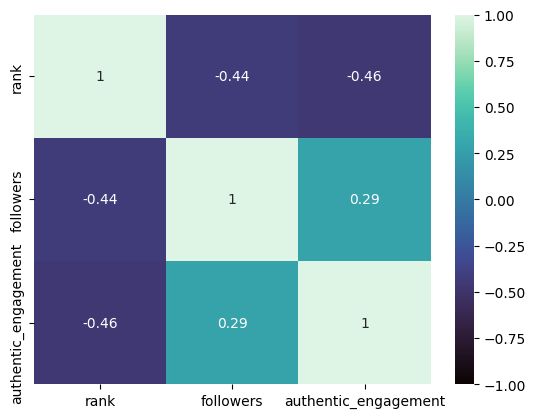

In [59]:
plt.figure()
fig = sns.heatmap(instagram3.corr(), cmap="mako", annot=True, vmin=-1, vmax=1)
plt.show()

Creamos también el gráfico de dispersión para poder contrastar la información que nos aparece en el heatmap

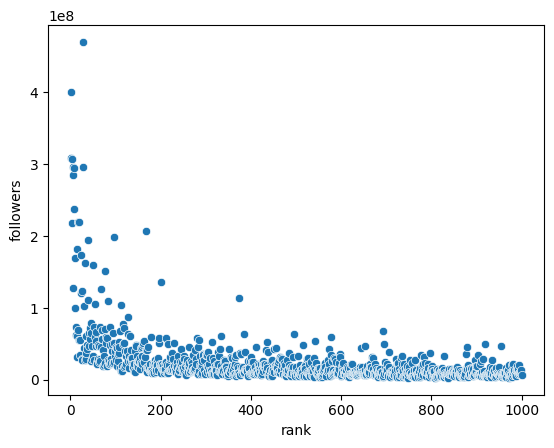

In [60]:
plt.figure()
fig = sns.scatterplot(x= "rank", data= instagram3, y="followers")
plt.show()

Relación authentic_engagement - rank = Vemos que tiene una correlación negativa moderada, es decir que si la audiencia aumenta,  disminuiría en el ranking, es decir, estarían en los puestos top (1, 2...).

Relación followers - rank = Vemos que tiene una correlación negativa moderada, es decir que si los followers aumenta, disminuiría en el ranking, es decir, estarian en los puestos top (1, 2..).

Relación authentic-engagement - followers = Vemos que tiene una corrrelación positiva baja, es decir que si la audiencia aumenta también aumentan los followers pero de una manera poco significativa.

Sesgos de alguna de las variables numéricas del dataset.

Creamos un gráfico distplot para ver el sesgo de la variable followers

/tmp/ipykernel_436/77183619.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(instagram3["followers"], color="blue", kde=True)


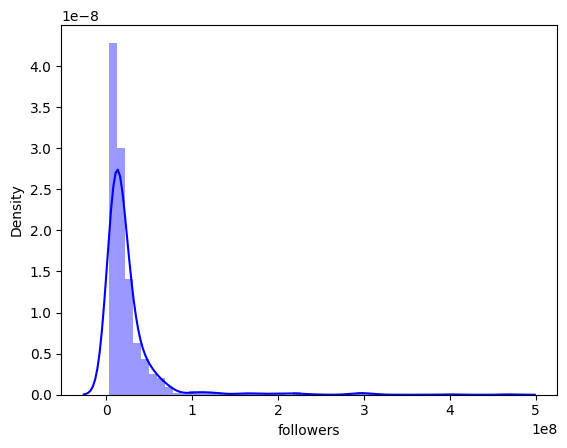

In [61]:
plt.figure()
fig = sns.distplot(instagram3["followers"], color="blue", kde=True)
plt.show()

Followers = Está sesgada a la derecha (sesgo positivo) como vemos en la gráfica. Para ver el valor del sesgo utilizamos el método skew

In [62]:
sesgo_followers = skew(instagram3["followers"])
print(f"El valor del sesgo para la variable followers es {sesgo_followers}")

El valor del sesgo para la variable followers es 5.841688024139401


Authentic engagement:

Creamos un gráfico distplot para ver el sesgo de la variable Authentic Engagement

/tmp/ipykernel_436/2999405306.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(instagram3["authentic_engagement"], color="blue", kde=True)


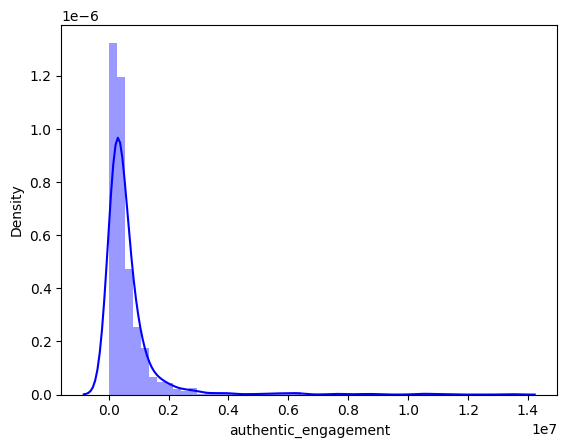

In [63]:
plt.figure()
fig = sns.distplot(instagram3["authentic_engagement"], color="blue", kde=True)
plt.show()

Authentic Engagement = Está sesgada a la derecha (sesgo positivo) como vemos en la gráfica. Para ver el valor del sesgo utilizamos el método skew

In [64]:
sesgo_engagement = skew(instagram3["authentic_engagement"])
print(f"El valor del sesgo para la variable followers es {sesgo_engagement}")

El valor del sesgo para la variable followers es 6.261574785511843


Intervalo de confianza de algunas de las variables numéricas del dataset

Followers

In [65]:
datos = instagram3["followers"]

print(st.t.interval(alpha=0.95, df=len(datos)-1, loc=np.mean(datos), scale=st.sem(datos)))
print(np.mean(datos))

(22433253.549261674, 27238946.450738326)
24836100.0


/tmp/ipykernel_436/1238266483.py:3: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print(st.t.interval(alpha=0.95, df=len(datos)-1, loc=np.mean(datos), scale=st.sem(datos)))


Aqui vemos que hay un 95% de probabilidades de que la media de followers se encuentre en el intervalo (22433253.549261674, 27238946.450738326)

Authentic Engagement

In [66]:
datos2 = instagram3["authentic_engagement"]

print(st.t.interval(alpha=0.95, df=len(datos2)-1, loc=np.mean(datos2), scale=st.sem(datos2)))
print(np.mean(datos2))

(580936.8938247674, 717308.7061752327)
649122.8


/tmp/ipykernel_436/1010384125.py:3: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print(st.t.interval(alpha=0.95, df=len(datos2)-1, loc=np.mean(datos2), scale=st.sem(datos2)))


Aqui vemos que hay un 95% de probabilidades de que la media de engagement se encuentre en el intervalo (580936.8938247674, 717308.7061752327)

2.- Interpretación de los resultados.

Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

Se ha ido interpretando los resultados a medida que se iban realizando.

Happy coding 📊📈📉